# G2M: Cab Industry

### Week 2

##### Submitted By: Aman Niyaz

**Buisness Problem:**<br>US cab company is majory of two kinds; _Pink Cab_ and _Yellow Cab._ Our problem is to find out which Cab company would be good choice to invest in. For this purpose, we should find the advantages(profits) of that car compared to another one. Whichever cab company seems suitable in terms on market value, we would invest in that.

## Importing Libraries

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Loading Dataset

In [123]:
df_cab = pd.read_csv('./datasets/Cab_Data.csv')
df_city = pd.read_csv('./datasets/City.csv')
df_cust = pd.read_csv('./datasets/Customer_ID.csv')
df_tran = pd.read_csv('./datasets/Transaction_ID.csv')

In [124]:
df_cab.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,42375,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [125]:
print("Number of rows: ", df_cab.shape[0])
print("Number of columns: ", df_cab.shape[1])

Number of rows:  359392
Number of columns:  7


In [126]:
print("Minimum Date: ", df_cab['Date of Travel'].min())
print("Maximum Date: ", df_cab['Date of Travel'].max())

Minimum Date:  42371
Maximum Date:  43465


In [127]:
##Handling Traveling Date
from datetime import datetime

min_date = df_cab['Date of Travel'].min()
max_date = df_cab['Date of Travel'].max()

trans_min = datetime.fromordinal(datetime(1900, 1, 30).toordinal() + min_date - 2).strftime("%d-%m-%Y")
trans_max = datetime.fromordinal(datetime(1900, 1, 30).toordinal() + max_date - 2).strftime("%d-%m-%Y")

print(trans_min)
print(trans_max)

31-01-2016
29-01-2019


In [128]:
def handle_date(date):
    convert = datetime.fromordinal(datetime(1900, 1, 30).toordinal() + date - 2).strftime("%d-%m-%Y")
    return datetime.strptime(convert, "%d-%m-%Y")

In [129]:
df_cab['Date of Travel'] = df_cab['Date of Travel'].apply(lambda x: handle_date(x))

In [130]:
df_cab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-02-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,2016-02-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,2016-01-31,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,2016-02-05,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,2016-02-01,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,2018-02-06,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-02-02,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-02-03,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-02-03,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [131]:
df_city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [132]:
df_cust

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [133]:
df_tran

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [134]:
df_cab_copy = df_cab
df_city_copy = df_city
df_cust_copy = df_cust
df_tran_copy = df_tran

In [135]:
df_tran_cust = pd.merge(df_tran, df_cust, on='Customer ID')
df_tran_cust

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237
...,...,...,...,...,...,...
440093,10439799,12490,Cash,Male,33,18713
440094,10439820,14971,Card,Male,30,15346
440095,10439838,41414,Card,Male,38,3960
440096,10439840,41677,Cash,Male,23,19454


In [136]:
df_cab_tran_cust = pd.merge(df_cab, df_tran_cust, on='Transaction ID')
df_cab_tran_cust

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-02-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10000012,2016-02-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
2,10000013,2016-01-31,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242
3,10000014,2016-02-05,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327
4,10000015,2016-02-01,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-02-06,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651
359388,10440104,2018-02-02,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528
359389,10440105,2018-02-03,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966
359390,10440106,2018-02-03,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423


In [137]:
df_cab_tran_cust_city = pd.merge(df_cab_tran_cust, df_city, on='City')
df_cab_tran_cust_city

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-02-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10000012,2016-02-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
2,10000013,2016-01-31,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701"
3,10000014,2016-02-05,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,"814,885","24,701"
4,10000015,2016-02-01,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-02-06,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,"418,859","127,001"
359388,10440104,2018-02-02,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,"418,859","127,001"
359389,10440105,2018-02-03,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,"418,859","127,001"
359390,10440106,2018-02-03,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,"418,859","127,001"


##### Handling Population and Users datafield

In [138]:
def convert_int(x):
    return int(x.replace(',', ''))

In [139]:
df_cab_tran_cust_city['Population'] = df_cab_tran_cust_city['Population'].apply(lambda x: convert_int(x))
df_cab_tran_cust_city['Users'] = df_cab_tran_cust_city['Users'].apply(lambda x: convert_int(x))
df_cab_tran_cust_city

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-02-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10000012,2016-02-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
2,10000013,2016-01-31,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885,24701
3,10000014,2016-02-05,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,814885,24701
4,10000015,2016-02-01,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-02-06,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,418859,127001
359388,10440104,2018-02-02,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,418859,127001
359389,10440105,2018-02-03,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,418859,127001
359390,10440106,2018-02-03,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,418859,127001


In [140]:
df_cab_tran_cust_city['Profit'] = df_cab_tran_cust_city['Price Charged'] - df_cab_tran_cust_city['Cost of Trip']
df_cab_tran_cust_city['Year'] = df_cab_tran_cust_city['Date of Travel'].dt.year
df_cab_tran_cust_city['Month'] = df_cab_tran_cust_city['Date of Travel'].dt.month
df_cab_tran_cust_city['Day'] = df_cab_tran_cust_city['Date of Travel'].dt.day

In [141]:
df_cab_tran_cust_city

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Year,Month,Day
0,10000011,2016-02-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,57.3150,2016,2,6
1,10000012,2016-02-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,23.6660,2016,2,4
2,10000013,2016-01-31,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885,24701,27.5680,2016,1,31
3,10000014,2016-02-05,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,814885,24701,25.7980,2016,2,5
4,10000015,2016-02-01,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,814885,24701,16.8440,2016,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-02-06,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,418859,127001,5.8800,2018,2,6
359388,10440104,2018-02-02,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,418859,127001,6.9020,2018,2,2
359389,10440105,2018-02-03,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,418859,127001,87.4200,2018,2,3
359390,10440106,2018-02-03,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,418859,127001,32.1420,2018,2,3


## EDA Starts here

Now our Exploratory Data Analysis(EDA) starts. We have merged all four dataset safely without lossing any data. Although we have raise many null values. But we are going to see how the data is going to perform. First we take the dataset produced in a new dataframe `df`. Lets start working on this.

In [142]:
df = df_cab_tran_cust_city
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Year,Month,Day
0,10000011,2016-02-06,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701,57.315,2016,2,6
1,10000012,2016-02-04,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701,23.666,2016,2,4
2,10000013,2016-01-31,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701,27.568,2016,1,31
3,10000014,2016-02-05,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701,25.798,2016,2,5
4,10000015,2016-02-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885,24701,16.844,2016,2,1


Let's save our master dataset

In [143]:
df.to_csv('datasets/masterdata.csv')

In [144]:
df.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
Profit                0
Year                  0
Month                 0
Day                   0
dtype: int64

**CONCLUSION:** Here we don't see any missing values, the reason being is that I merged the dataset in such a way that we have maximum of the dataset filled. I also tried the other way round where I was getting around 87,000 missing values for almost five columns which could be difficult to understand the bahviour of the dataset. hence I approached it in this way where I simply erased those many data points at the time of merging them.

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  int64         
 13  Users               359392 no

## Understanding the numerical dataset

Below we can understand some of the important numerical attributes such as `KM Travelled`, `Price Charged`, `Cost of Trip`, `Age`, `Income(USD/Month)`, `Population` and `Users`. These are really crutial data. We ignore the `Transaction ID` and `Customer ID` here as they are not of any significance at the moment. 

In [146]:
df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users,Profit,Year,Month,Day
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,3.132198e+06,158365.582267,137.253198,2017.167319,6.986725,15.602340
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,3.315194e+06,100850.051020,160.311840,0.860754,3.742463,8.851313
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,2.489680e+05,3643.000000,-220.060000,2016.000000,1.000000,1.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,6.712380e+05,80021.000000,28.012000,2016.000000,4.000000,8.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,1.595037e+06,144132.000000,81.962000,2017.000000,8.000000,16.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,8.405837e+06,302149.000000,190.030000,2018.000000,10.000000,23.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,8.405837e+06,302149.000000,1463.966000,2019.000000,12.000000,31.000000


<AxesSubplot:>

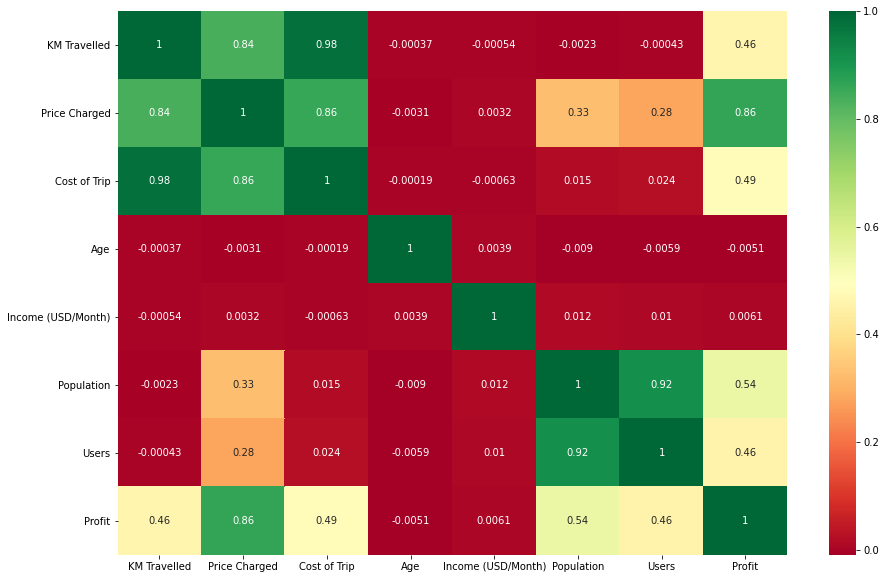

In [147]:
#correlation matrix
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', 'Income (USD/Month)', 'Population', 'Users', 'Profit']].corr(), annot=True, cmap="RdYlGn", ax=ax)

**CONCLUSION:** Clearly the correlation between the fields are obvious. The heatmap shows that `KM Travelled` is very much related to `Cost of Trip` and `Price Charged`. Also it doesn't depend on Age or Income of the customer.

There is a strong correlation between `Population` and `Users` as well which is very obvious.

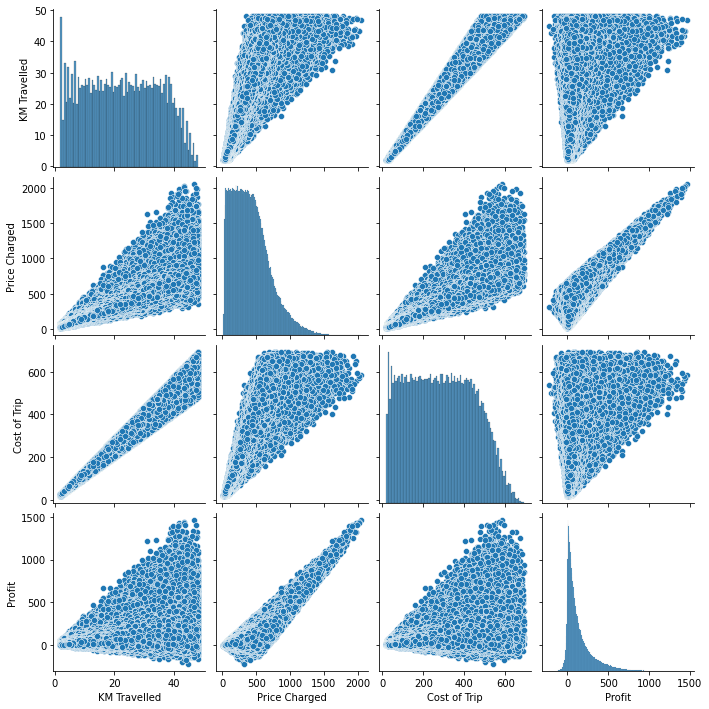

In [148]:
sns.pairplot(data=df[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit']])
plt.show()

### Understanding the categorical columns

In [149]:
cat_col = ['Company', 'City', 'Payment_Mode', 'Gender']
for name in cat_col:
    print(f"*************{name}****************")
    print("TOTAL: ", df[name].count())
    print(df[name].value_counts())
print("##############END###############")

*************Company****************
TOTAL:  359392
Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64
*************City****************
TOTAL:  359392
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64
*************Payment_Mode****************
TOTAL:  359392
Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64
*************Gender****************
TOTAL:  359392
Male      205912
Female    153480
Name: Gender, dtype: int64
##############END###############


**CONCLUSION:** Clearly, we can see the number of categorical data to each datafield. Some nice observations are: They are only two types of Cab companies `Yellow Cab` and `Pink Cab`. `Yellow Cab` is widely preferred by the customers. `Payment_Mode` - `Card` payment has  2/3rd of the `Cash` payment. Also, `Male` and `Female` customers ratio is somewhat _4:3_

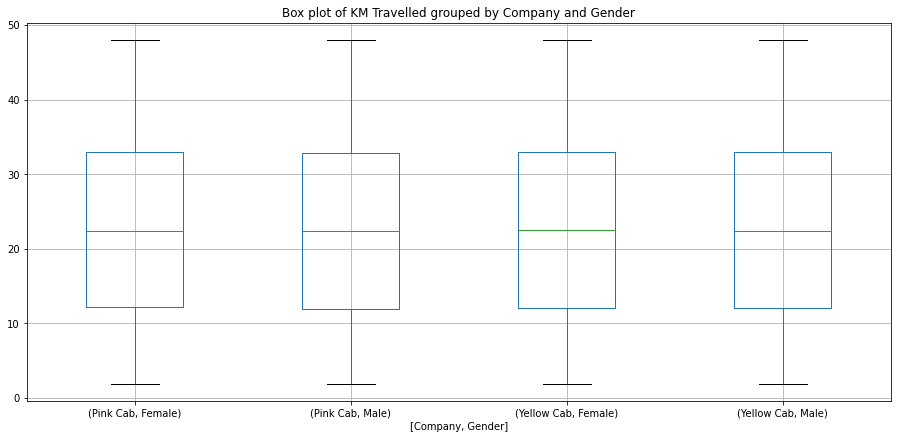

In [150]:
# Boxp lots of balance, grouped by the categorical attribute education
df.boxplot(column='KM Travelled', by=['Company', 'Gender'], figsize=(15, 7))
plt.title('Box plot of KM Travelled grouped by Company and Gender')
plt.suptitle("")
plt.show()

**CONCLUSION:** We see that there are no outliers in the data. It is because the data collection is from an authentic source.

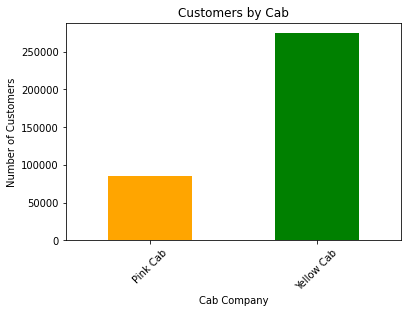

In [151]:
df['Company'].value_counts(ascending=True).plot(kind='bar', color=['orange', 'green'], rot=45)
plt.xlabel('Cab Company')
plt.ylabel('Number of Customers')
plt.title('Customers by Cab')
plt.show()

In [152]:
df['Year'].value_counts()

2017    126376
2018    124916
2016     93661
2019     14439
Name: Year, dtype: int64

In [153]:
pinkprofit=df[df.Company=='Pink Cab'].groupby(df['Year']).Profit.mean()
yellowprofit=df[df.Company=='Yellow Cab'].groupby('Year').Profit.mean()
print("Pink Cab Profit:->\n", pinkprofit)
print("\nYellow Cab Profit:->\n", yellowprofit)

Pink Cab Profit:->
 Year
2016    63.864163
2017    66.459466
2018    56.538648
2019    74.704456
Name: Profit, dtype: float64

Yellow Cab Profit:->
 Year
2016    171.379921
2017    169.083129
2018    145.837970
2019    134.707558
Name: Profit, dtype: float64


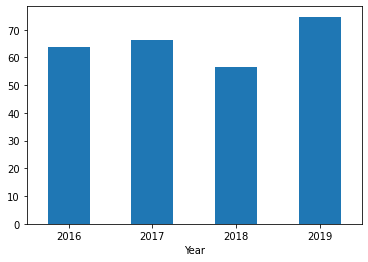

In [154]:
#Average yearly profit _ pink cab
ax = pinkprofit.plot.bar(rot=0)

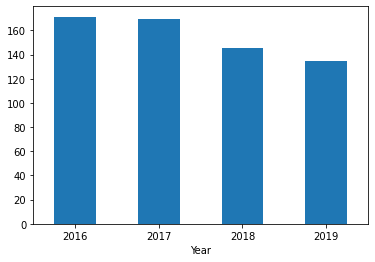

In [155]:
#Average yearly profit _ yellow cab
ax = yellowprofit.plot.bar(rot=0)

In [175]:
date_trans=df.groupby('Date of Travel')['Transaction ID'].count().sort_values(ascending=False)
date_trans

Date of Travel
2018-02-03    2022
2018-01-13    1123
2018-01-06    1100
2019-01-13    1086
2017-12-23    1085
              ... 
2016-02-17      88
2016-02-10      86
2016-02-09      85
2016-02-03      47
2016-02-02      25
Name: Transaction ID, Length: 1095, dtype: int64

In [176]:
#data grouped bt Transaction ID
mtr=df.groupby(['Month'])['Transaction ID'].count()
mtr

Month
1     46068
2     20759
3     19673
4     21006
5     22132
6     23375
7     25633
8     27126
9     31765
10    38172
11    38806
12    44877
Name: Transaction ID, dtype: int64

In [178]:
#data grouped bt Transaction ID
ytr=df.groupby(['Year'])['Transaction ID'].count()
ytr

Year
2016     93661
2017    126376
2018    124916
2019     14439
Name: Transaction ID, dtype: int64

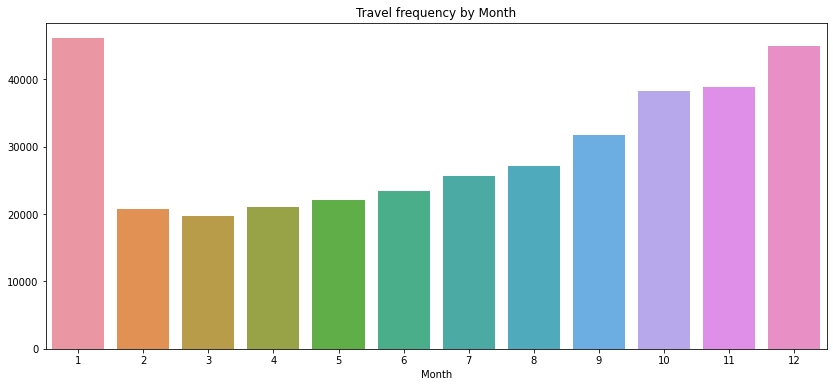

In [179]:
#Monthwise Analysis
plt.figure(figsize=(14,6))
sns.barplot(x=mtr.index,y=mtr.values)
plt.title('Travel frequency by Month')
plt.show()

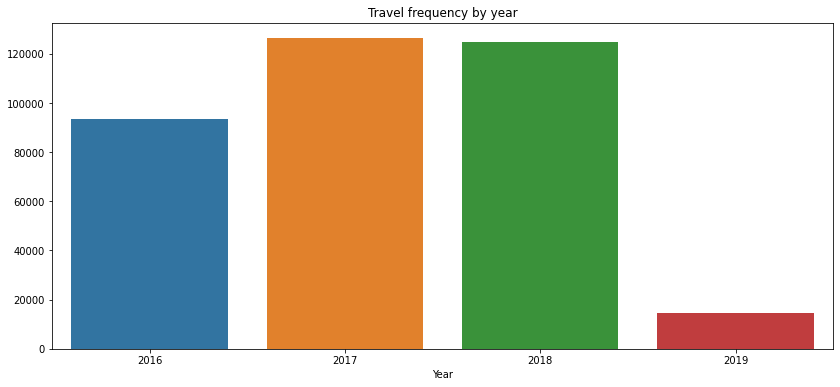

In [180]:
#Analysis-Yearly Transaction 
plt.figure(figsize=(14,6))
sns.barplot(x=ytr.index,y=ytr.values)
plt.title('Travel frequency by year')
plt.show()

**CONCLUSION:** The highest number of travel is in the year of 2017 and then in 2018. As we have less data for the year 2019 hence it's showing less result. But with the analysis, we understand that `2016` had less number of travels with respect to years `2017` and `2018`

In [181]:
yctr = df.groupby(['Year','Company'])['Transaction ID'].count().to_frame().reset_index()
yctr

,Year,Company,Transaction ID
0,2016,Pink Cab,21734
1,2016,Yellow Cab,71927
2,2017,Pink Cab,29750
3,2017,Yellow Cab,96626
4,2018,Pink Cab,29730
5,2018,Yellow Cab,95186
6,2019,Pink Cab,3497
7,2019,Yellow Cab,10942


In [182]:
df.groupby('Company')['Income (USD/Month)'].mean()

Company
Pink Cab      15059.047137
Yellow Cab    15045.669817
Name: Income (USD/Month), dtype: float64

In [185]:
#Analysis_City 
city = df.groupby('City')['Transaction ID'].count().sort_values(ascending=False)
city

City
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: Transaction ID, dtype: int64

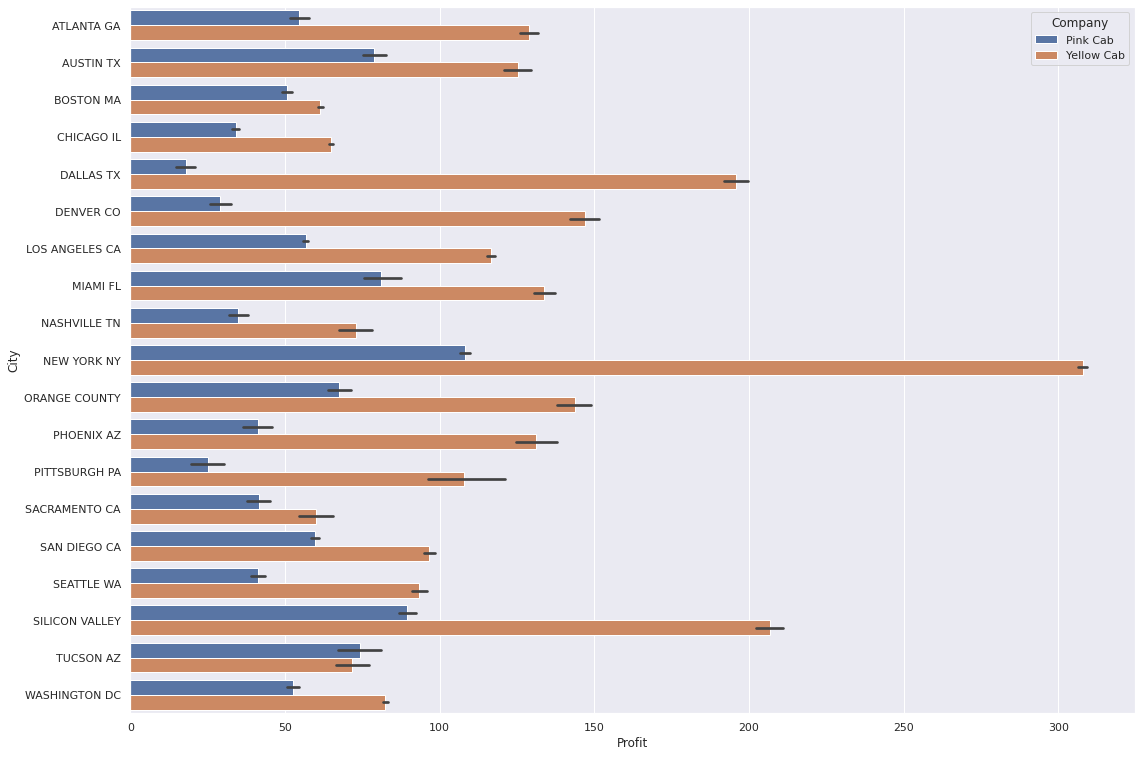

In [186]:
sns.set(rc={'figure.figsize':(18, 13)})
ax = sns.barplot(x="Profit", y="City", data=df,hue='Company')

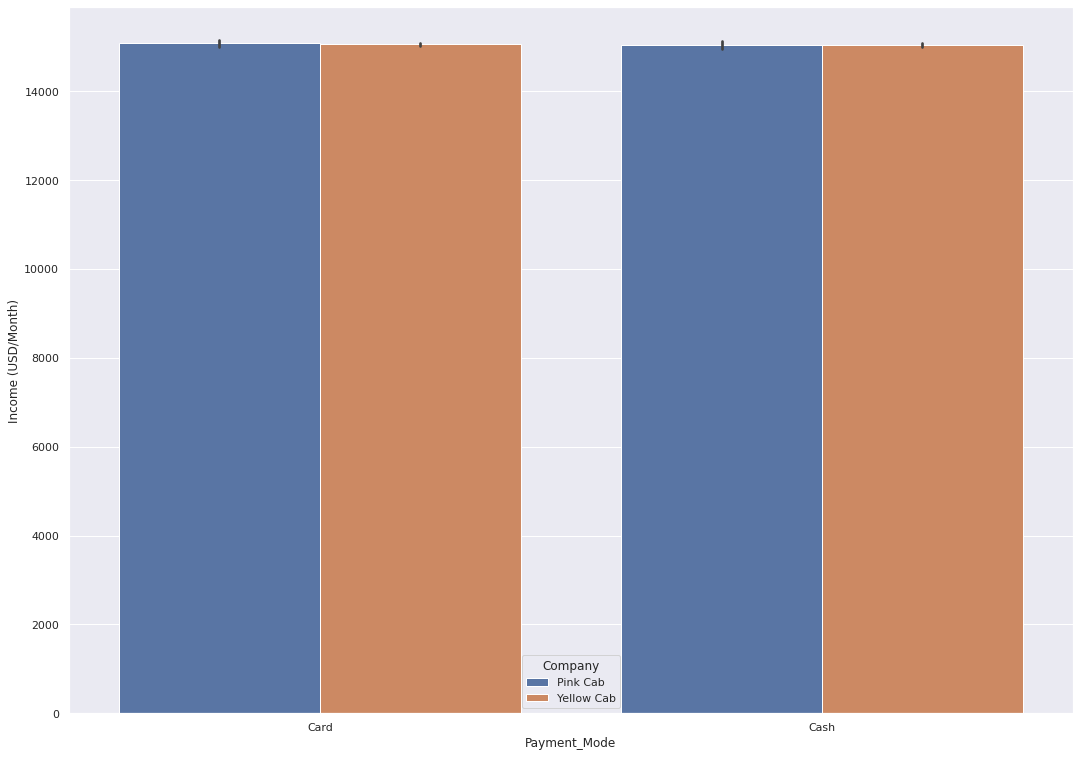

In [188]:
#Payment Mode Analysis
ax = sns.barplot(x="Payment_Mode", y="Income (USD/Month)", data=df, hue='Company')

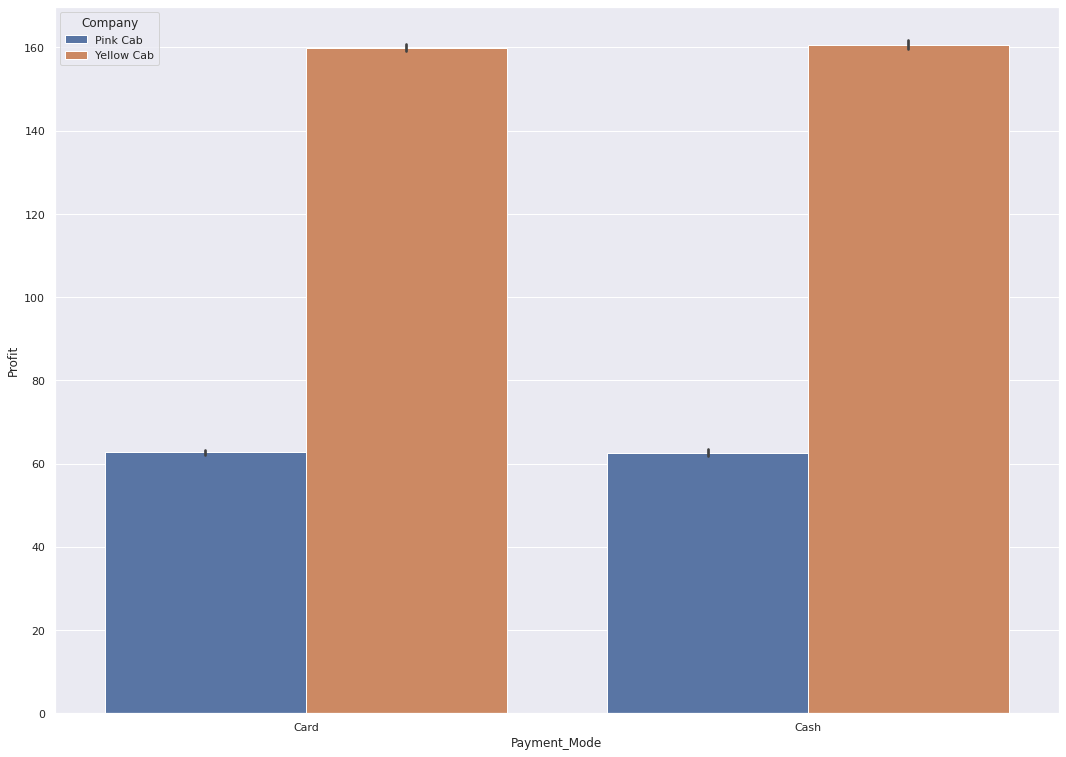

In [189]:
#relation between payment and profit
ax = sns.barplot(x="Payment_Mode", y="Profit", data=df, hue='Company')

In [191]:
#Gender Analysis
pink_gender=df[df.Company=='Pink Cab'].groupby(['Gender'])['Transaction ID'].count()
pink_gender

Gender
Female    37480
Male      47231
Name: Transaction ID, dtype: int64

In [192]:
yellow_gender=df[df.Company=='Yellow Cab'].groupby(['Gender'])['Transaction ID'].count()
yellow_gender

Gender
Female    116000
Male      158681
Name: Transaction ID, dtype: int64

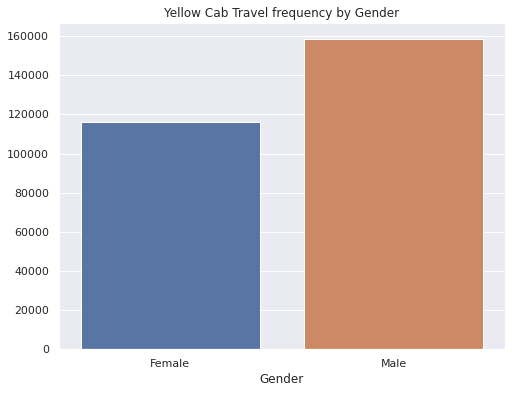

In [193]:
plt.figure(figsize=(8,6))
sns.barplot(x=yellow_gender.index, y=yellow_gender.values)
plt.title('Yellow Cab Travel frequency by Gender')
plt.show()

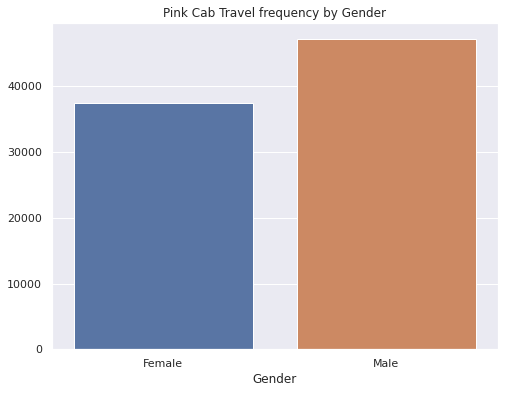

In [194]:
plt.figure(figsize=(8,6))
sns.barplot(x=pink_gender.index, y=pink_gender.values)
plt.title('Pink Cab Travel frequency by Gender')
plt.show()

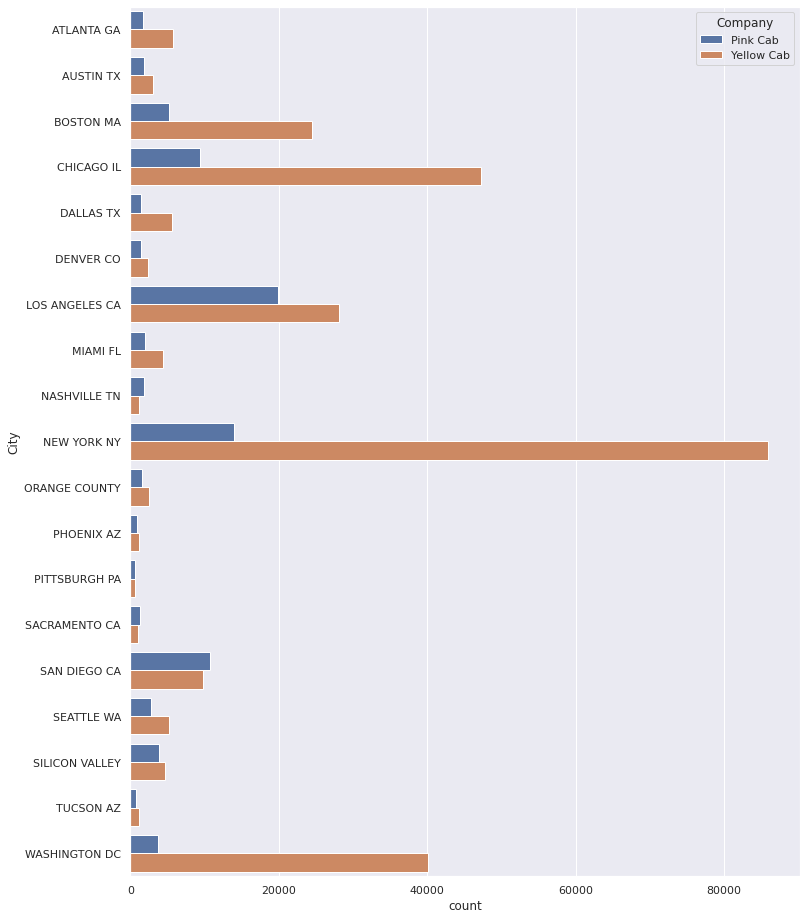

In [195]:
f, ax = plt.subplots(figsize=(12, 16))
# sns.set(style="darkgrid")
ax = sns.countplot(y='City', hue='Company', data=df)
plt.show()

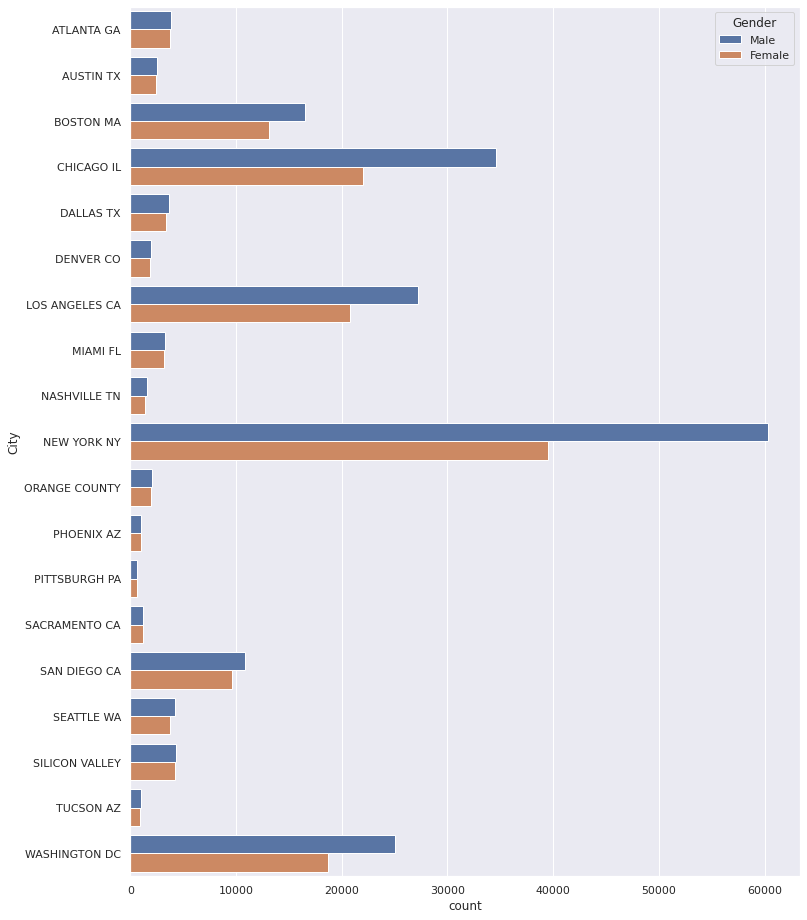

In [196]:
f, ax = plt.subplots(figsize=(12, 16))
# sns.set(style="darkgrid")
ax = sns.countplot(y='City', hue='Gender', data=df)
plt.show()

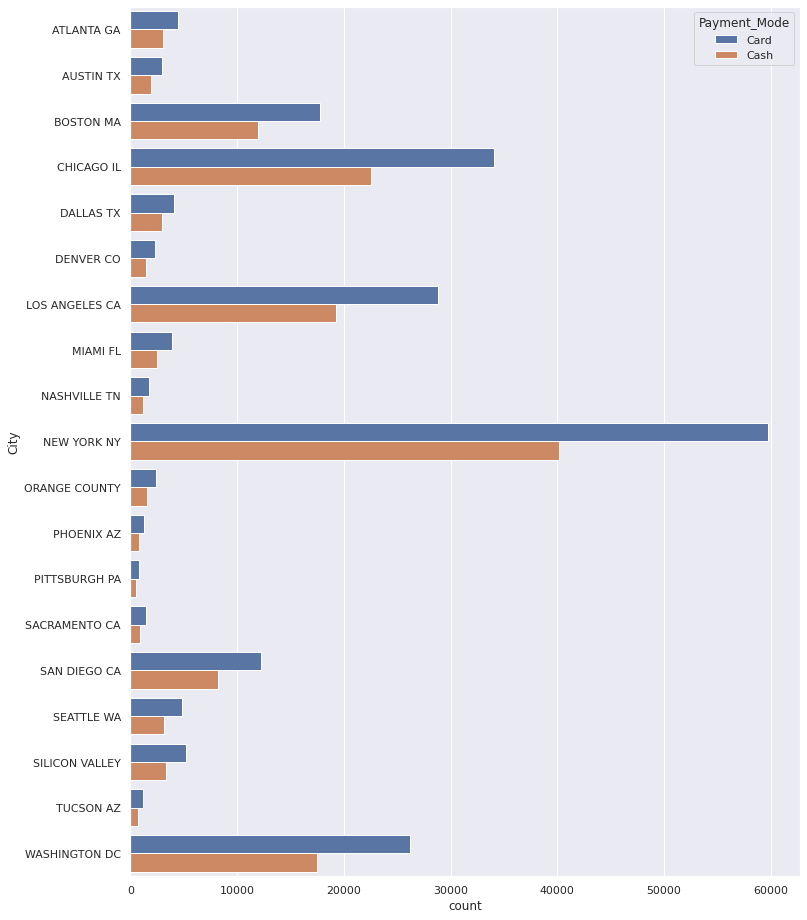

In [197]:
f, ax = plt.subplots(figsize=(12, 16))
# sns.set(style="darkgrid")
ax = sns.countplot(y='City', hue='Payment_Mode', data=df)
plt.show()

## Summary

The above Exploratory Data Analysis (EDA) finds various dynamics of the data of two cab companies: `Pink Cab` and `Yellow Cab`. We found that there are no null values in the master dataframe. `Yellow Cab` is seen having more profit than the `Pink Cab`. Yellow cab is preferred by the users over pink cab. However the profit of yellow cab is decreasing over the years whereas the pink cab's profit is increasing. It's been seen that January and December is having the maximum number of travels and it's obvious because these months are generally holidays month. In summary yellow cab would be the preferred one to invest in.